## Lateral induction between growing cells in a density gradient

In [1]:
%load_ext blackcellmagic

In [2]:
import lattice_signaling as lsig
import numpy as np
import pandas as pd
from tqdm import tqdm

import holoviews as hv
import colorcet as cc
hv.extension("matplotlib")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [3]:
import numba

from scipy.spatial import Voronoi, ConvexHull
from scipy.sparse import csr_matrix

#### Functions for integration

In [4]:
def get_rhs(sender_idx, func):
    def rhs(S, S_delay, *args):
        return func(S, S_delay, sender_idx, *args)
    return rhs


def tc_rhs_3_L(S, S_delay, sender_idx, alpha, k, p, delta, L):
    """
    """

    # Get input signal across each interface
    S_bar = L @ S_delay

    # Calculate dE/dt
    dS_dt = (
        alpha
        * (S_bar ** p)
        / (
            (6 / np.sqrt(3) * k) ** p
            + (6 / np.sqrt(3) * delta * S_delay) ** p
            + S_bar ** p
        )
        - S
    )

    # Set sender cell to zero
    dS_dt[sender_idx] = 0

    return dS_dt

#### Functions for calculating cell-cell contacts

In [5]:
@numba.njit
def circle_intersect_length(c1, c2, r):
    """Length of the intersection between two circles of radius `r`."""
    
    # Get distance between circle centers
    d = np.linalg.norm(c1 - c2)
    
    # Get length of interface, with a floor of zero
    ell2 = np.maximum(r**2 - (d**2)/4, 0)
    return 2 * np.sqrt(ell2)
    
@numba.njit
def circle_intersect_length2(c1, c2, r1, r2):
    """Length of the intersection between two circles of radius `r1` and `r2`."""
    
    # Get distance between circle centers
    d = np.linalg.norm(c1 - c2)
    
    # Check if circles do not intersect
    if d >= (r1 + r2):
        return 0
    
    # Else, calculate intersection length
    return 2 * r1 * np.sqrt(1 - ((r1**2 + d**2 - r2**2) / (2 * r1 * d))**2)

In [6]:
@numba.njit
def get_L_vals(n, xs, vs, vertices):
    """"""
    # Make matrix cell-cell contact lengths
    
    n_l = 0
    for v1, v2 in vs:
        if (v1 >= 0) & (v2 >= 0):
            n_l += 1
    
    Lij = np.zeros((n_l, 2), dtype=np.int_)
    L_vals = np.empty(n_l, dtype=np.float32)
    
    k = 0
    for i, x12 in enumerate(xs):
        v1, v2 = vs[i]
#         v1, v2 = vs
#         cs, (v1, v2)
        # Infinite Voronoi edges have zero length
        if (v1 < 0) | (v2 < 0):
            continue
        
        # Get length of cell-cell ridge
        ell = np.linalg.norm(vertices[v1] - vertices[v2])
        Lij[k] = x12
        L_vals[k] = ell
        
        k += 1
        
    return Lij, L_vals

def make_L(vor):
    """csr_matrix((data, (row_ind, col_ind)), [shape=(M, N)])
    a[row_ind[k], col_ind[k]] = data[k]."""
    n = vor.npoints
    xs = vor.ridge_points
    vs = np.array(vor.ridge_vertices)
    vertices = vor.vertices
    
    Lij, L_vals = get_L_vals(n, xs, vs, vertices)
    L = csr_matrix((L_vals, (*Lij.T,)), shape=(n, n))
#     return n, Lij, L_vals
    return L + L.T

In [7]:
@numba.njit
def get_L_vals_gaps(n, xs, vs, pts, vertices, cr=1/np.sqrt(3)):
    """
    Cell-cell contact lengths for cell radius `cr`.
    """
    # Make matrix cell-cell contact lengths
    n_l = 0
    for v1, v2 in vs:
        if (v1 >= 0) & (v2 >= 0):
            n_l += 1
    
    Lij = np.zeros((n_l, 2), dtype=np.int_)
    L_vals = np.empty(n_l, dtype=np.float32)
    
    k = 0
    for i, x_pair in enumerate(xs):
        v1, v2 = vs[i]
#         v1, v2 = vs
#         cs, (v1, v2)
        # Infinite Voronoi edges have zero length
        if (v1 < 0) | (v2 < 0):
            continue
        
        # Get length of Voronoi ridge
        ell_vor = np.linalg.norm(vertices[v1] - vertices[v2])
        
        # Get length of circles intersection
        ell_cir = circle_intersect_length(pts[x_pair[0]], pts[x_pair[1]], cr)
        
        # Store the lower value of interface length
        L_vals[k] = np.minimum(ell_vor, ell_cir)
        
        # Store point indices
        Lij[k] = x_pair

        k += 1
        
    return Lij, L_vals

def make_L_gaps(vor, cr):
    """
    """
    n = vor.npoints
    xs = vor.ridge_points
    vs = np.array(vor.ridge_vertices)
    pts = vor.points
    vertices = vor.vertices
    
    Lij, L_vals = get_L_vals_gaps(n, xs, vs, pts, vertices, cr=cr)
    L = csr_matrix((L_vals, (*Lij.T,)), shape=(n, n))

    return L + L.T

#### Density gradient functions

In [8]:
def dens_lin(p, findens=2, loc=10):
    """Linear density gradient."""
    a = (findens - 1) / loc
    return 1 + a * p

def r_lin(r, findens=2, loc=10):
    a = (1/np.sqrt(findens) - 1) / loc
    return 1 + a * r

In [9]:
def r_exp(r, maxdens=2, loc=10):
    """Exponential density gradient."""
    a = np.log(np.sqrt(maxdens))/loc
    return np.exp(-a*r)

def r_exp_int(r, maxdens=2, loc=10):
    """Integral of r_exp. Maps a distance to a new 
    distance under an exponential density gradient."""
    a = np.log(np.sqrt(maxdens))/loc
    return 1/(-a) * (np.exp(-a*r) - 1)

<hr>

Consider a spatially varying density function $\rho(x,y)$. Density denotes the number of cells per unit area, so (assuming the standard basis for $x$ and $y$) we can define the average cell-cell distance as

\begin{align}
r(x, y)=\frac{1}{\sqrt{\rho(x,y)}}.
\end{align}

Let's consider a case where a fixed number of cells are seeded with a perfectly uniform density of $1$ throughout the coordinate grid. Now a contour integral over $r(x,y)$ can be used to compute a mapping of cell location from the uniform density distribution to the arbitrary density distribution $\rho(x,y)$, such that a cell at the origin remains fixed. There are infinitely many paths that can be chosen, so we choose a simple one. The mapping for a point $(x_i, y_i)$ is

\begin{align}
(x'_i, y'_i) &= \int_{(0,0)}^{(x_i,y_i)}{r(x,y)\, dV} \\
&= \int_{(0,0)}^{(0,y_i)}{r(x,y)\, dV} + \int_{(0,y_i)}^{(x_i,y_i)}{r(x,y)\, dV} \\
\end{align}

where $V = (x,y)$.

Let $\rho(x,y)$ be an exponential gradient over $y$.

\begin{align}
\rho(x,y) &= \rho_0 e^{-a|y|} = \rho(y),
\end{align}

where $a$ and $\rho_0$ parameterize the steepness of the gradient and its value at $(0,0)$, respectively. The two paths then break down into integrals over separate variables. For $x,y \geq 0$, new cell locations can be calculated as

\begin{align}
y'_i &= \int_0^{y_i}{\frac{dy}{\sqrt{\rho(y)}}} \\
&= \int_0^{y_i}{\frac{dy}{\sqrt{\rho_0 e^{-ay}}}} \\
&= \frac{1}{\sqrt{\rho_0}}\int_0^{y_i}{e^{\frac{ay}{2}} dy} \\
&= \frac{2}{a \sqrt{\rho_0}} \left(e^{\frac{ay_i}{2}} - 1\right) \\
x'_i &= \frac{1}{\sqrt{\rho(y_i)}}\, x_i = \frac{x_i}{\sqrt{\rho_0}} e^{\frac{a y_i}{2}} \\
\end{align}

Finally, we obtain $a$ in terms of $\rho_0$ and a reference density $\rho_{y_k}=\rho(y_k)$, where $y_k > 0$ is a reference $y$-value.

\begin{align}
\rho_{y_k} &= \rho_0 e^{-a y_k} \\
-a y_k &= \ln{\frac{\rho_{y_k}}{\rho_0}} \\
a &= \frac{1}{y_k} \ln{\frac{\rho_0}{\rho_{y_k}}}
\end{align}

In [10]:
def exp_dens(y, rho_0, rho_k, y_k):
    a = np.log(rho_0 / rho_k) / np.abs(y_k)
    return rho_0 * np.exp(-a * np.abs(y))


def map_xy_exp_dens(xy, rho_0, rho_k, y_k):
    a = np.log(rho_0 / rho_k) / np.abs(y_k)
    yp = (
        np.sign(xy[:, 1])
        * (2 / (a * np.sqrt(rho_0)))
        * (np.exp(a * np.abs(xy[:, 1]) / 2) - 1)
    )
    xp = xy[:, 0] / np.sqrt(rho_0) * np.exp(a * np.abs(xy[:, 1]) / 2)
    
    return np.array([xp, yp]).T


def map_xy_exp_dens_t(xy, nt, rho_0_t0, rho_0_tfin, rho_k_t0, rho_k_tfin, y_k):
    rho_0_t = np.linspace(rho_0_t0, rho_0_tfin, nt)
    rho_k_t = np.linspace(rho_k_t0, rho_k_tfin, nt)
    return np.array(
        [map_xy_exp_dens(xy, r0, rk, y_k) for r0, rk in zip(rho_0_t, rho_k_t)]
    )

#### Initialize a regular hexagonal lattice

In [11]:
# Set lattice dimensions
rows, cols = 241, 225
r = 1
X = lsig.hex_grid(rows, cols, r=r).astype(np.float32)
n = X.shape[0]

# Get initial cell radius
cr = r/np.sqrt(3)   # beta = 1.

# Normalize locations to a reference cell
refx = (cols // 2) * rows + 0
X = X - X[refx]

In [12]:
# Set density at distance r=0 at beginning and end of time
rho_0_t0 = 4.2
rho_0_tfin = 1.5 * rho_0_t0

# Set density at a reference location 
rho_k_t0, rho_k_tfin = rho_0_t0/8, rho_0_tfin * (5/6)

# Set reference y-value
y_k = 50

In [13]:
-2 * np.log(rho_0_t0 / rho_k_t0) / np.abs(y_k) * y_k / (np.exp(-2 * np.log(rho_0_t0 / rho_k_t0) / np.abs(y_k) * y_k) - 1)

4.224897100555856

In [14]:
rho_0_t0, rho_0_tfin, rho_k_t0, rho_k_tfin

(4.2, 6.300000000000001, 0.525, 5.250000000000001)

In [15]:
# Set time parameters for simulation
tmax = 4
nt_t = 100
nt = nt_t * tmax + 1
t = np.linspace(0, tmax, nt, dtype=np.float32)

# First time-unit and last time-unit have constant density
tlin_span = 3
nt_lin = tlin_span * nt_t

In [275]:
nplots = 6
nx = 100
y_ = np.linspace(0, y_k * 2, nx)
idx_ = np.linspace(0, nt-1, nplots, dtype=int)
rho_0_ = np.linspace(rho_0_t0, rho_0_tfin, nplots)
rho_k_ = np.linspace(rho_k_t0, rho_k_tfin, nplots)

data = pd.DataFrame(np.concatenate(np.array(
    [
        (y_ - y_k, exp_dens(y_, r0, rk, y_k), t[i] * np.ones(nx))
        for i, r0, rk in zip(idx_, rho_0_, rho_k_)
    ]
), axis=1).T)

data.columns = ["position", "density", "simulation time"]

:NdOverlay   [simulation time]
   :Curve   [position]   (density,simulation time)
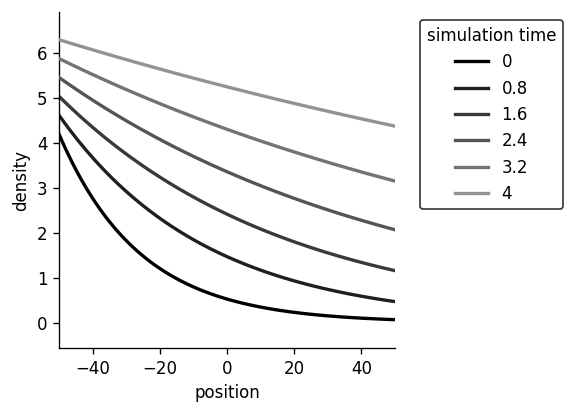

In [276]:
%%capture --no-stdout --no-display

cycle = lsig.sample_cycle(cc.b_linear_grey_0_100_c0[:-100], nplots)

plt = hv.Curve(
    data=data,
    kdims=["position"], 
    vdims=["density", "simulation time"]
).groupby(
    "simulation time"
).overlay(
).opts(
    legend_position="right",
).options(
    {"Curve": dict(color=cycle)}
)

hv.output(plt, dpi=120)

In [17]:
X_t_lin = map_xy_exp_dens_t(X, nt_lin, rho_0_t0, rho_0_tfin, rho_k_t0, rho_k_tfin, y_k)

X_t = np.concatenate(
    [
#         np.repeat(X_t_lin[:1], nt_t, axis=0),
        X_t_lin,
        np.repeat(X_t_lin[-1:], nt - nt_lin, axis=0),
    ]
)

In [18]:
X_t = np.array([x - np.array([0, y_k]) for x in X_t])

:Layout
   .Overlay.I  :Overlay
      .Points.I  :Points   [x,y]
      .Points.II :Points   [x,y]
      .Ellipse.I :Ellipse   [x,y]
   .Overlay.II :Overlay
      .Points.I  :Points   [x,y]
      .Points.II :Points   [x,y]
      .Ellipse.I :Ellipse   [x,y]
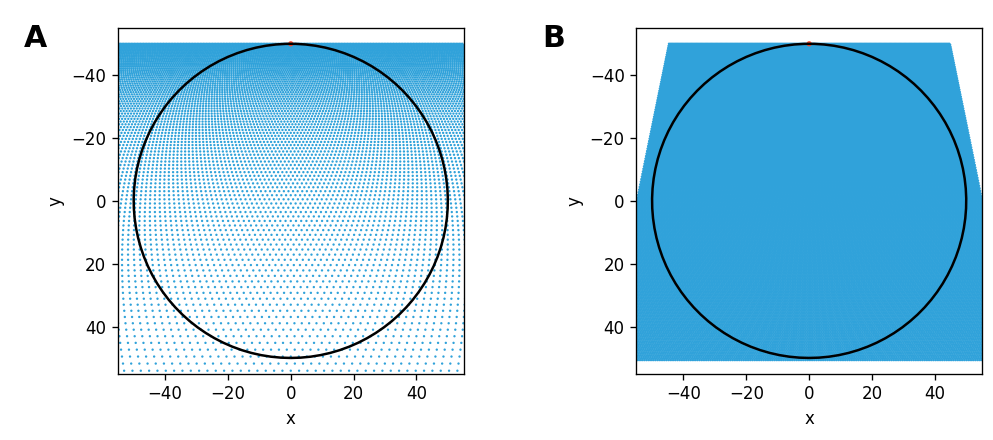

In [19]:
%%capture --no-stdout --no-display

padding=0.1
xlim = -(1 + padding) * y_k, (1 + padding) * y_k, 
ylim = (1 + padding) * y_k, -(1 + padding) * y_k, 

plt0 = hv.Points(
    X_t[0]
).opts(
    s=2, 
    aspect='equal', 
    xlim=xlim,
    ylim=ylim,
) * hv.Points(
    X_t[0][refx][np.newaxis, :]
).opts(
    s=10
) * hv.Ellipse(0, 0, 2*y_k)

pltfin = hv.Points(
    X_t[-1]
).opts(
    s=2, 
    aspect='equal', 
    xlim=xlim,
    ylim=ylim,
) * hv.Points(
    X_t[-1][refx][np.newaxis, :]
).opts(
    s=10
) * hv.Ellipse(0, 0, 2*y_k)

hv.output(plt0 + pltfin, dpi=120)

#### Make a density gradient that contracts over time

In [20]:
# Get contact lengths
iterator = X_t
iterator = tqdm(iterator)

L_t = []
for x in iterator:
    L_t.append(make_L_gaps(Voronoi(x), cr=cr))
L_t = np.array(L_t)

100%|██████████| 401/401 [07:41<00:00,  1.15s/it]


#### Visualize how density affects cell-cell contacts

:Layout
   .Points.I  :Points   [x,y]
   .Points.II :Points   [x,y]
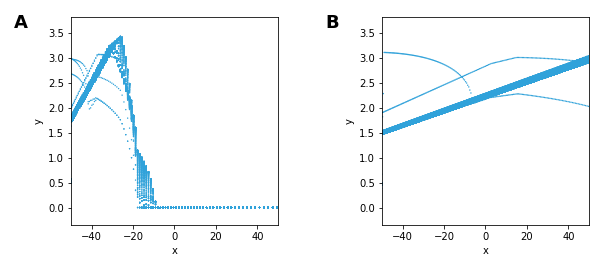

In [21]:
%%capture --no-stdout --no-display

# Plot cell-cell contact area vs. y-coordniate
plt0 = hv.Points(
    (X_t[0, :, 1], L_t[0] @ np.ones(n))
).opts(
    s=2,
    xlim=(-y_k, y_k),
) 

pltfin = hv.Points(
    (X_t[-200, :, 1], L_t[-200] @ np.ones(n))
).opts(
    s=2,
    xlim=(-y_k, y_k),
) 

plt0 + pltfin

In [22]:
# # Assign senders at regular intervals (~2% of cells)
# sender_idx = []
# for i in range(n):
#     row = i % rows
#     col = i // rows
#     if (row % 8 == 1) & (col % 8 == 0):
#         sender_idx.append(i)
# sender_idx = np.array(sender_idx)

In [253]:
# Assign senders randomly (% of cells)
pct_s = 5
n_s = int(n * (pct_s/100)) + 1
sender_idx = np.random.choice(n, n_s, replace=False)

In [254]:
# where_senders = np.ones((1, nc))
# where_senders[0, sender_idx] = 2

# title_fun = lambda i: f"Time={t[i]:.2f}"

# # idx=500

# lsig.inspect_out(
#     X=Xc,
#     cell_radii=cr * np.ones((1, nc)),
#     var=where_senders, 
# #     idx=idx,
#     vmin=0, 
#     vmax=2, 
#     cmap="kgy",
#     ifcc=cc.CET_L8[110],
#     ppatch_kwargs=dict(edgecolor=None, linewidth=0.),
#     lcoll_kwargs=dict(edgecolor=None,linewidth=0.),
# #     title=title_fun(idx),
# #     xlim=xlim,
# #     ylim=ylim,
# #     aspect=10,
# #     axis_off=True,
# )

In [255]:
# %%capture --no-stdout --no-display

# plt1 = hv.Points(
#     Xc_arr[0],
# ).options(
#     {'Points': dict(
#         s=2,
# #         xlim=(300, 320),
# #         ylim=(-10, 10),
#         aspect=cols/rows
#     )}
# ) * hv.Points(Xc_arr[0, sender_idx]).opts(color="red", s=2)

# plt2 = hv.Points(
#     Xc_arr[-1],
# ).options(
#     {'Points': dict(
#         s=2,
# #         xlim=(300, 320),
# #         ylim=(-10, 10),
#         aspect=cols/rows
#     )}
# ) * hv.Points(Xc_arr[-1, sender_idx]).opts(color="red", s=2)

# plt1 + plt2

<hr>


In [256]:
# Set parameters
alpha = 3
k = 0.12
p = 2
delta = 3

# Package into args
args = (alpha, k, p, delta, L_t[0])

# Set delay
delay = 0.4

In [257]:
# Get RHS of DDE
rhs = get_rhs(sender_idx, tc_rhs_3_L)

# Set initial conditions
S0 = np.zeros(n)
S0[sender_idx] = 1

In [258]:
# Perform integration (method of steps)
S_t = lsig.integrate_DDE_varargs(    
    t,
    rhs,
    var_vals=L_t,
    dde_args=args,
    E0=S0,
    delay=delay,
    progress_bar=True,
    min_delay=5,
    where_vars=4,
)

100%|██████████| 400/400 [00:00<00:00, 519.34it/s]


In [259]:
# # Get plotting window
# xlim = X_t[-1, :, 0].min() - 1, X_t[-1, :, 0].max() + 1
# ylim = X_t[-1, :, 1].min() - 1, X_t[-1, :, 1].max() + 1

In [260]:
# Get plotting window for a circle of cells (~culture dish)
xlimcir = -y_k, y_k
ylimcir = y_k, -y_k

In [261]:
# Make mask for cells in circle
X_dists = np.linalg.norm(X_t, axis=2)

X_masks = np.array([d <= y_k for d in X_dists])

S_t_cir = S_t.copy()
for i in range(nt):
    S_t_cir[i, ~X_masks[i]] = 0

In [262]:
import matplotlib.pyplot as plt
%matplotlib inline

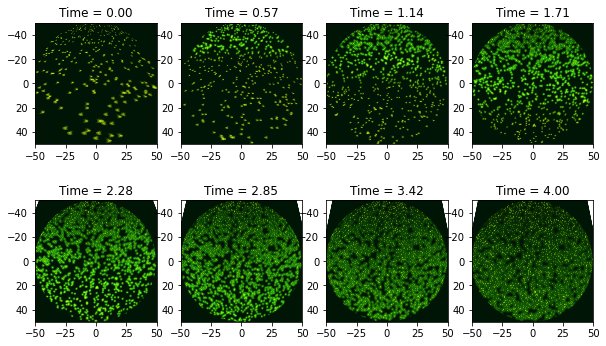

In [263]:
nrows, ncols = 2, 4
nplot = nrows * ncols
idx = [int(i) for i in np.linspace(0, nt-1, nplot)]

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,6))
for ax, i in zip(axs.flat, idx):
    title=f"Time = {t[i]:.2f}"
    lsig.inspect_colormesh(
        ax=ax,
        X=X_t,
        rows=rows,
        cols=cols,
        var=S_t_cir, 
        idx=i,
        vmin=0, 
        vmax=1, 
        cmap="kgy",
        xlim=xlimcir,
        ylim=ylimcir,
        title=title,
    )

Writing to: plots\rho0_4.20-6.30_rhok0.53-5.25_yk50.00_5.0pctsender.mp4


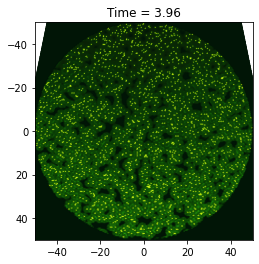

In [274]:
title_fun = lambda i: f"Time = {t[i]:.2f}"
fname = "rho0_{0:.2f}-{1:.2f}_rhok{2:.2f}-{3:.2f}_yk{4:.2f}_{5:.1f}pctsender.mp4".format(
    rho_0_t0, rho_0_tfin, rho_k_t0, rho_k_tfin, y_k, pct_s
)

lsig.animate_colormesh(
    X_arr=X_t,
    rows=rows,
    cols=cols,
    var_t=S_t_cir,
    n_frames=100,
    file_name=fname,
#     dir_name="plots",
    fps=20, 
    vmin=0, 
    vmax=1, 
    cmap="kgy",
    title_fun=title_fun,
    xlim=xlimcir,
    ylim=ylimcir,
)

In [265]:
tc_masks = X_masks.copy()
tc_masks[:, sender_idx] = False

tc_y_pos_t = [y[m] for y, m in zip(X_t[:, :, 1], tc_masks)]

tc_fluor_t = [s[m] for s, m in zip(S_t, tc_masks)]

In [266]:
# S_hist = np.(tc_y_pos, bins = np.linspace(-y_k, y_k, 21))
nbins = 20
y_bins = np.linspace(-y_k, y_k, nbins + 1)
# t_samples = np.arange(tmax, dtype=int) * nt_t
t_samples = (np.linspace(0, tmax, 6) * nt_t).astype(int)

In [267]:
tc_normfluor_t_bins = np.zeros((t_samples.size, nbins))
tc_fluor_t_bins = np.zeros((t_samples.size, nbins))
for i, t_ in enumerate(t_samples):
    idx_hist = np.digitize(tc_y_pos_t[t_], bins = y_bins)
    for ib in range(nbins):
        tc_fluor_t_bins[i, ib] = tc_fluor_t[t_][idx_hist == (ib + 1)].mean()
    normfluor = np.array(tc_fluor_t_bins[i] / tc_fluor_t_bins[i].max())
    normfluor = np.nan_to_num(normfluor)
    tc_normfluor_t_bins[i] = normfluor

C:\Users\Pranav\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


In [268]:
data = pd.DataFrame(
    tc_fluor_t_bins, 
    columns=y_bins[1:] - (np.diff(y_bins)/2), 
    index=t[t_samples],
).reset_index().melt(id_vars="index")
data.columns = ["simulation time", "position", "mean fluorescence"]

In [269]:
normdata = pd.DataFrame(
    tc_normfluor_t_bins, 
    columns=y_bins[1:] - (np.diff(y_bins)/2), 
    index=t[t_samples],
).reset_index().melt(id_vars="index")
normdata.columns = ["simulation time", "position", "normalized fluorescence"]

:NdOverlay   [simulation time]
   :Curve   [position]   (mean fluorescence,simulation time)
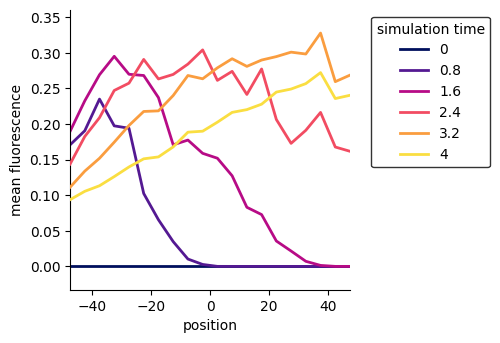

In [270]:
%%capture --no-stdout --no-display

cycle = lsig.sample_cycle(cc.linear_bmy_10_95_c71[:-20], nplots)

plt = hv.Curve(
    data=data,
    kdims=["position"],
    vdims=["mean fluorescence", "simulation time"],
).groupby(
    "simulation time"
).overlay(
).opts(
    legend_position="right"
).options(
    {"Curve": dict(color=cycle)}
)

hv.output(plt, dpi=100)

:NdOverlay   [simulation time]
   :Curve   [position]   (normalized fluorescence,simulation time)
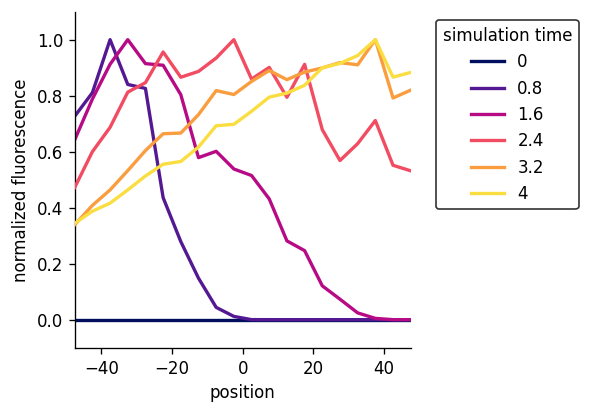

In [271]:
%%capture --no-stdout --no-display

cycle = lsig.sample_cycle(cc.linear_bmy_10_95_c71[:-20], nplots)

plt = hv.Curve(
    data=normdata,
    kdims=["position"],
    vdims=["normalized fluorescence", "simulation time"],
).groupby(
    "simulation time"
).overlay(
).opts(
    legend_position="right"
).options(
    {"Curve": dict(color=cycle)}
)

hv.output(plt, dpi=120)

In [272]:
X_masks[-1].sum()

38854